#Simple Linear Regression Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

data = {'Hours_Studied (X)': [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5],
        'Exam_Score (Y)': [52, 56, 62, 63, 66, 70, 71, 75, 78, 80, 82, 85, 87, 89, 90]}
df = pd.DataFrame(data)

df

,Hours_Studied (X),Exam_Score (Y)
0,1.5,52
1,2.0,56
2,2.5,62
3,3.0,63
4,3.5,66
5,4.0,70
6,4.5,71
7,5.0,75
8,5.5,78
9,6.0,80


#Assumption 1: Linearity Check

Correlation Matrix


In [ ]:
#Correlation matrix --> -1(inversly)    0   +1(directly)
correlation_matrix = df.corr()
correlation_matrix

,Hours_Studied (X),Exam_Score (Y)
Hours_Studied (X),1.00000,0.99283
Exam_Score (Y),0.99283,1.00000


<Axes: xlabel='Hours_Studied (X)', ylabel='Exam_Score (Y)'>

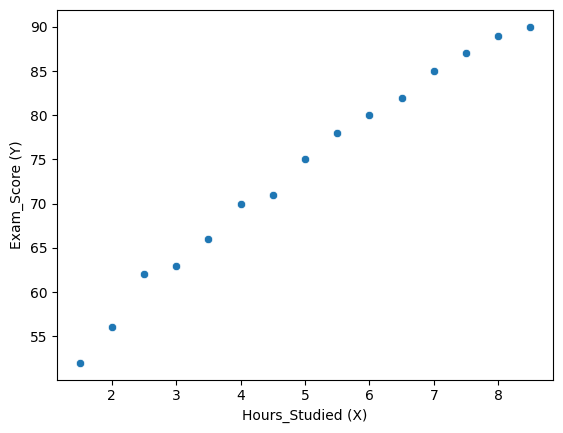

In [ ]:
#scatter plot
sns.scatterplot(x='Hours_Studied (X)', y='Exam_Score (Y)', data=df)

In [ ]:
#split X and Y
X = df[['Hours_Studied (X)']]
y = df['Exam_Score (Y)']

In [ ]:
  #train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12, 1)
X_test shape: (3, 1)
y_train shape: (12,)
y_test shape: (3,)


In [ ]:
#model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[5.13868036]
48.175819834057684


In [ ]:
X_test

,Hours_Studied (X)
9,6.0
11,7.0
0,1.5


In [ ]:
y_test

,Exam_Score (Y)
9,80
11,85
0,52


In [ ]:
#predict
y_pred = model.predict(X_test)
y_pred

array([79.00790202, 84.14658238, 55.88384038])

In [ ]:
#concat X_test and Y_test
df_test = pd.concat([X_test, y_test], axis=1)
df_test

,Hours_Studied (X),Exam_Score (Y)
9,6.0,80
11,7.0,85
0,1.5,52


In [ ]:
#accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5.598932046781627
R-squared: 0.9734507964061988


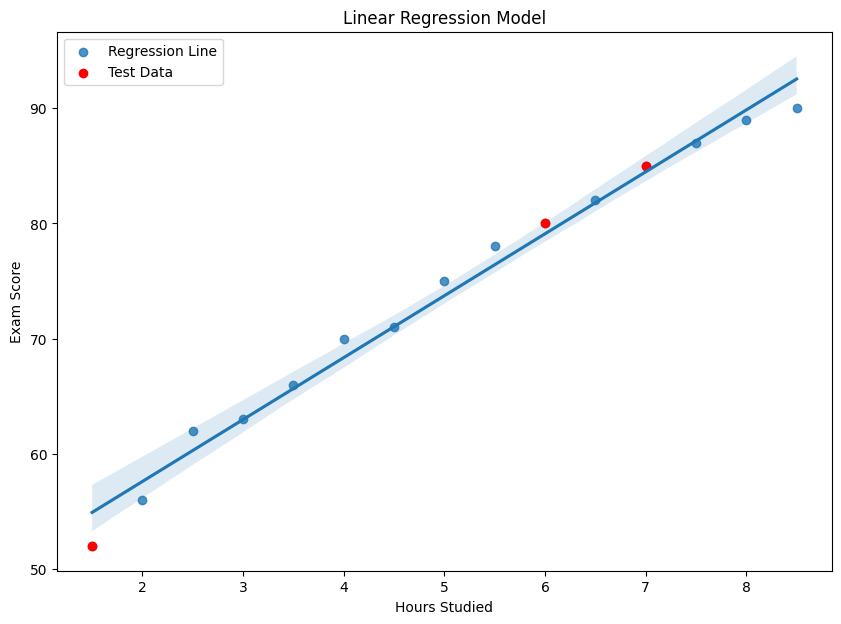

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(x='Hours_Studied (X)', y='Exam_Score (Y)', data=df, label='Regression Line')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression Model')
plt.legend()

In [ ]:
#concat X_train and y_train
import pandas as pd
train = pd.concat([X_train, y_train], axis=1)
train

,Hours_Studied (X),Exam_Score (Y)
13,8.0,89
5,4.0,70
8,5.5,78
2,2.5,62
1,2.0,56
14,8.5,90
4,3.5,66
7,5.0,75
10,6.5,82
12,7.5,87


#Predicting Insurance Charges

In [ ]:
#Import libraries for Linear Regression Models
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load /content/Processed_Insurance_data.csv
df=pd.read_csv('/content/Processed_Insurance_data.csv')
df.head()

,claim_amount,past_consultations,hospital_expenditure,annual_salary,children,smoker,charges
0,29087.54313,17.0,4720920.992,55784970.05,0.0,0,1121.8739
1,39053.67437,7.0,4329831.676,13700885.19,0.0,0,1131.5066
2,39023.62759,19.0,6884860.774,73523107.27,0.0,0,1135.9407
3,28185.39332,11.0,4274773.550,75819679.60,0.0,0,1136.3994
4,14697.85941,16.0,3787293.921,23012320.01,0.0,0,1137.0110


In [ ]:
#split x and y
x=df.drop('charges',axis=1)
y=df['charges']

In [ ]:
# trian test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
381.5322664246287


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train) #Compute Model Parameters B0(Intercept) and B1(Coefficient-Slope)

LinearRegression()

In [ ]:
#Model Parameters
print(model.intercept_)
print(model.coef_)

381.5322664246287
[1.10673909e-02 2.72744408e+01 5.42593268e-05 4.68706652e-05
 2.75423564e+02 2.95534858e+02]


In [ ]:
x_test.head(2)

,claim_amount,past_consultations,hospital_expenditure,annual_salary,children,smoker
527,48195.73809,4.0,7173071.857,1.410664e+08,1.0,0
359,52472.54165,11.0,3130504.944,3.143569e+07,5.0,0


In [ ]:
381.5322664246287 + 1.10673909e-02* 48195.73809 + 2.72744408e+01* 4.0 + 5.42593268e-05* 7173071.857 + 4.68706652e-05*1.410664e+08 + 2.75423564e+02* 1.0 + 0
#Manual Prediction using Model Parameters

8300.536722198804

In [ ]:
y_pred=model.predict(x_test)
y_pred # Predicted Value

array([ 8300.53638421,  4282.6737311 ,  6213.74105312,  4748.00482851,
        8386.33628129,  7641.13392343, 12577.92201378,  8271.27883247,
        3225.07416665, 13157.28634448,  6008.77953855,  1659.46349994,
        6374.72917902,  3308.80647052, 11048.84486365,  7026.73973379,
        3534.89781467,  4654.42136121, 12236.32765783,  4064.52492876,
        5224.325863  , 10945.17150166,  8210.44220872,  3800.49419506,
        5294.39237494,  2825.49595719,  9833.56967651,  2622.90977224,
       12903.13727738,  7619.89754449, 14158.46891598, 17662.60533196,
       19103.97805897,  4514.08587682, 19239.02939493,  9276.52225903,
        4994.96190268,  7121.91997278,  7758.41969727,  6140.84142945,
       13424.10501194,  7125.55216627,  5905.09509109,  6975.94647105,
       10837.82527575, 10999.24064253,  5674.00695435,  7445.42373484,
        6567.0059505 ,  7323.20055068,  6561.6419975 , 16682.64609104,
        2347.43225953,  8452.25060389,  5428.53001366,  1152.00926483,
      

In [ ]:
y_test # Actual Value

,charges
527,7358.17565
359,5080.09600
447,6358.77645
31,1629.83350
621,8733.22925
...,...
832,11945.13270
796,11482.63485
644,9140.95100
404,5708.86700


In [ ]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)

print("R-squared:", r2)

Root Mean Squared Error: 1783.3362451473522
Mean Squared Error: 3180288.163256257
R-squared: 0.8310475546905739


MOdel could be able to explain 83% of Variance in data.

It fails to explain the remaining variance in data

In [ ]:
#check underfitting and overfitting
y_train_pred=model.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse=root_mean_squared_error(y_train, y_train_pred)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_train, y_train_pred)

Root Mean Squared Error: 1885.125946551378


In [ ]:
print("Mean Squared Error:", mse)

print("R-squared:", r2)

Mean Squared Error: 3553699.834361229
R-squared: 0.8181156663666396


In [ ]:
import joblib
joblib.dump(model, 'Linear_model.joblib')

['Linear_model.joblib']

#Deployment file


In [ ]:
!pip install streamlit
!npm install localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.1 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 3s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [ ]:
%%writefile linear_Insurance.py
import streamlit as st
import numpy as np
import joblib

# Load the trained Linear Regression model
model = joblib.load('/content/Linear_model.joblib')

claim_amount = st.number_input("Claim Amount", min_value=0.0, format="%.2f")
past_consultations = st.number_input("Number of Past Consultations", min_value=0)
hospital_expenditure = st.number_input("Hospital Expenditure", min_value=0.0, format="%.2f")
annual_salary = st.number_input("Annual Salary", min_value=0.0,format="%.2f")
children = st.number_input("Number of Children", min_value=0,max_value=5)
smoker = st.selectbox("Is the person a smoker?", ["No", "Yes"])

# Encode smoker (0 = No, 1 = Yes)
smoker_encoded = 1 if smoker == "Yes" else 0

# Predict button
if st.button("Predict Insurance Charges"):
    # Create input array
    input_data = np.array([[claim_amount, past_consultations, hospital_expenditure, annual_salary, children, smoker_encoded]]) # predict for 1 person, 6 features

    # Make prediction
   # prediction = model.predict(input_data)[0]
    prediction1=model.predict(input_data)

   # mam just change the prediction = model.predict(input_data)[0] to prediction = model.predict(input_data)

    #st.success(f"💰 Estimated Insurance Charges: ₹{prediction:,.2f}")
    st.success(f"💰 Estimated Insurance Charges: ₹{prediction1[0]}")


Overwriting linear_Insurance.py


In [ ]:

inp1 = st.number_input("Enter feature 1", value=0.0)
inp2 = st.number_input("Enter feature 2", value=0.0)
inp3 = st.number_input("Enter feature 3", value=0.0)
inp4 = st.number_input("Enter feature 4", value=0.0)
inp5 = st.number_input("Enter feature 5", value=0.0)
inp6 = st.number_input("Enter feature 6", value=0.0)
inp7 = st.number_input("Enter feature 7", value=0.0)
# Predict button
if st.button("Predict"):
    # Convert inputs into numpy array for model
    features = np.array([[inp1, inp2, inp3, inp4, inp5, inp6, inp7]])
    prediction = model.predict(features)
    st.success(f"Prediction: {prediction[0]}")

this is the syntax

In [ ]:
!curl ipecho.net/plain

34.75.169.28

In [ ]:
!streamlit run linear_Insurance.py & npx localtunnel --port 8501

⠙


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.169.28:8501

your url is: https://small-aliens-hunt.loca.lt
  Stopping...
^C


In [ ]:
#version of scikit_learn
import sklearn
print(sklearn.__version__)


1.6.1


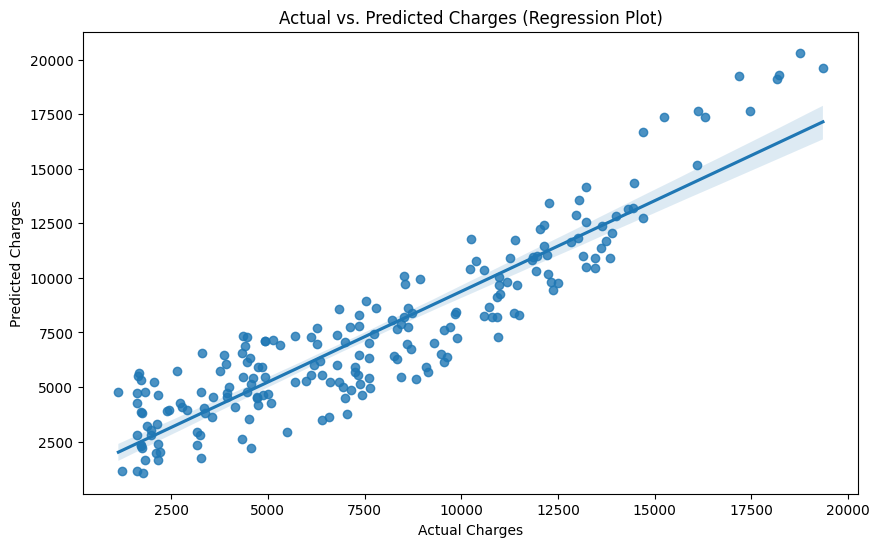

In [ ]:
# regplot for actual values and predicted values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (Regression Plot)")
plt.show()


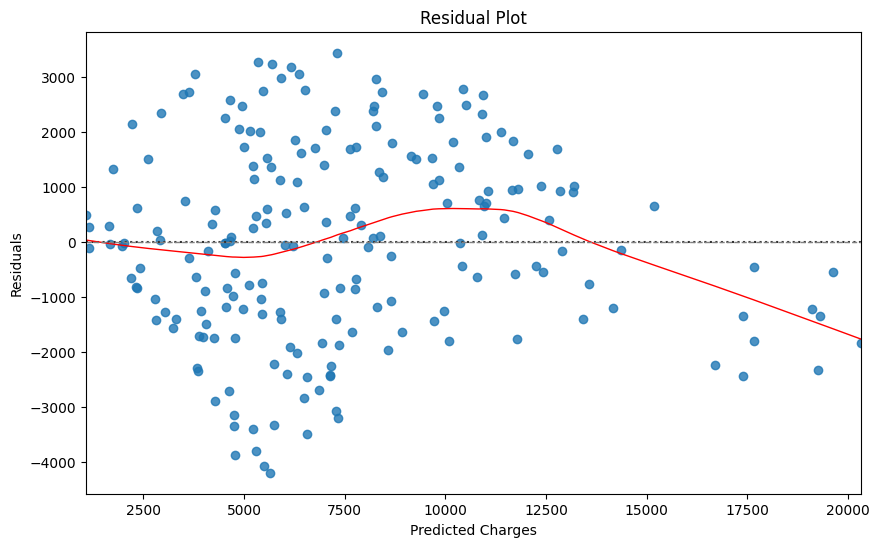

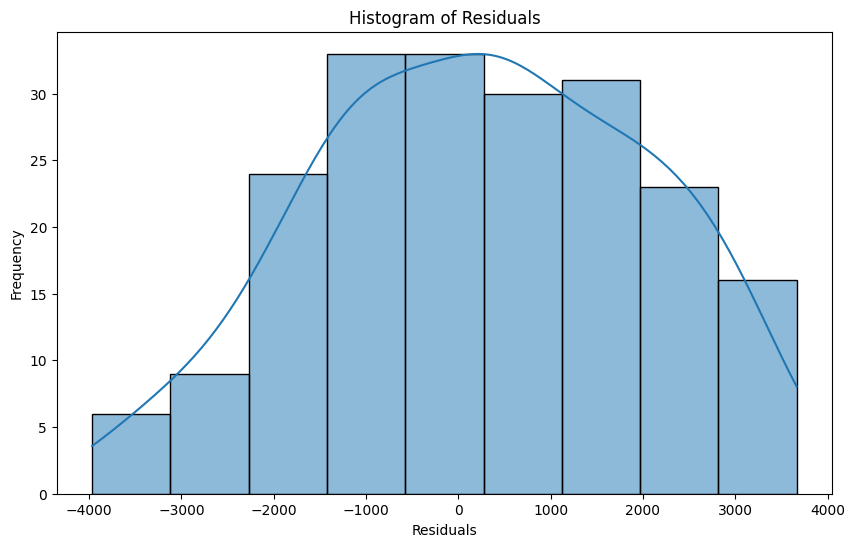

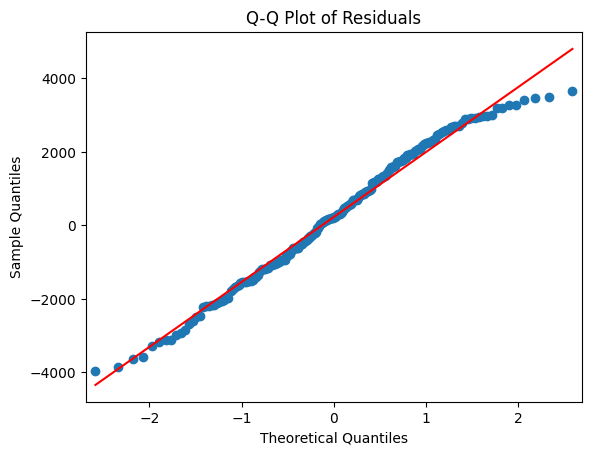

In [ ]:
# prompt: generate residual plots

import matplotlib.pyplot as plt
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='gray', linestyle='--', lw=1)
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Create a Q-Q plot of residuals to check for normality
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.03, max_depth=3,random_state=42)
gbm_reg.fit(x_train, y_train.ravel())


# Make predictions
y_train_pred = gbm_reg.predict(x_train)
y_test_pred = gbm_reg.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print(f"Training R²: {r2_train:.2f}")
print(f"Testing R²: {r2_test:.2f}")
print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
#[100,0.01],[100,0.03,3 best],[500,0.05][500,0.02],[100,0.07]

Training R²: 0.89
Testing R²: 0.85
Training MSE: 2150113.73
Testing MSE: 2829605.78
Training RMSE: 1466.33
Testing RMSE: 1682.14


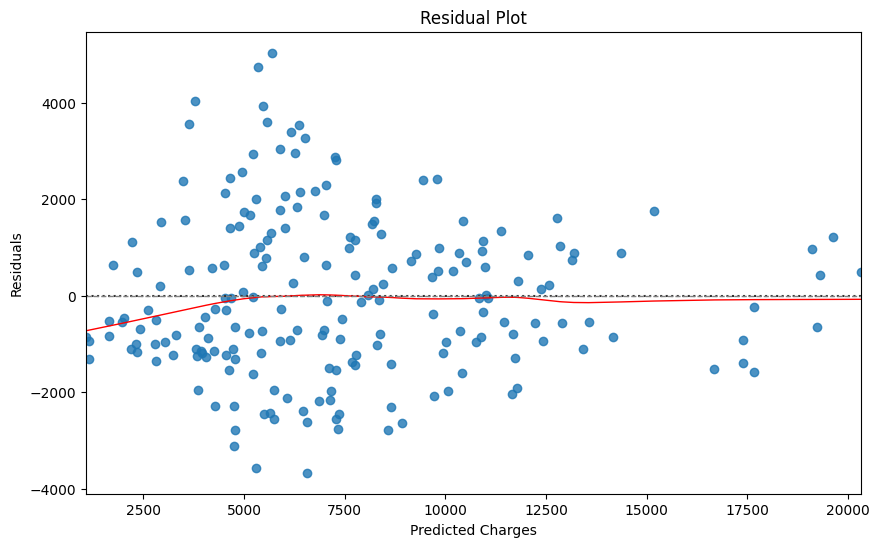

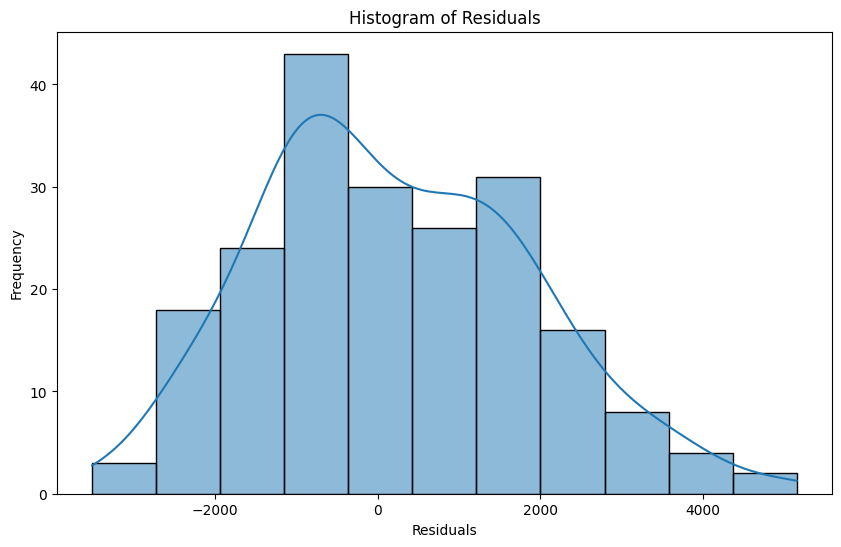

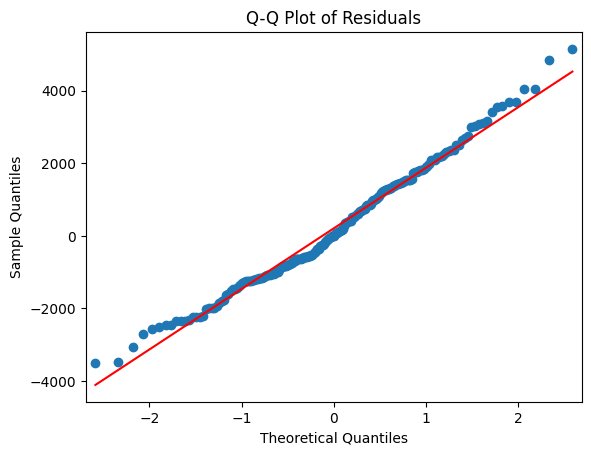

In [ ]:
# residual plots

import matplotlib.pyplot as plt
# Calculate residuals
residuals = y_test -y_test_pred
# Create a residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='gray', linestyle='--', lw=1)
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Create a Q-Q plot of residuals to check for normality
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()